1. Implementar una función en Python que calcule la media geométrica de un arreglo
de N elementos..


In [318]:
def calcular_media_geometrica(arreglo):

    if len(arreglo) == 0:
        raise None

    producto = 1
    for elemento in arreglo:
        producto *= elemento

    media_geometrica = producto**(1/len(arreglo))

    return media_geometrica

2. Implementar una función en C que calcule la media geométrica de un arreglo de N elementos


In [319]:
%%file media_geometrica.c
#include <stdio.h>
#include <math.h>

double calcularMediaGeometrica(double arreglo[], int n) {
    if (n == 0) {
       return 0;               
    }

    double producto = 1.0;

    for (int i = 0; i < n; i++) {
        producto *= arreglo[i];
    }

    double mediaGeometrica = pow(producto, 1.0 / n);

    return mediaGeometrica;
}


Overwriting media_geometrica.c


In [320]:
!gcc -c media_geometrica.c
!gcc -shared media_geometrica.o -o media_geometrica.so

3. Validar sus funciones con un arreglo de 8 elementos. Comparar su resultado con la
función pow de Python. Recordar que debe hacer uso de la librería ctypes para
llamar a su función en C.

In [321]:
import ctypes

lib = ctypes.CDLL("./media_geometrica.so")
lib.calcularMediaGeometrica.restype = ctypes.c_double
lib.calcularMediaGeometrica.argtypes = [ctypes.POINTER(ctypes.c_double), ctypes.c_int]

def funcion_media_geometrica_c(arreglo_v, tamanho):
    media = lib.calcularMediaGeometrica(arreglo_v,tamanho)
    return media

In [322]:
media_geometrica_c = funcion_media_geometrica_c

In [323]:
import numpy as np
import math
array = [np.random.uniform(low=0.0, high=100.0) for _ in range(8)]
print(array)

media_py = calcular_media_geometrica(array)

arr_c = (ctypes.c_double* len(array))(*array)
media_c = funcion_media_geometrica_c(arr_c, len(array))

media_pow = math.pow(math.prod(array), 1/len(array))

print("Media geométrica (Python):", media_py)
print("Media geométrica (C):", media_c)
print("Media geométrica (pow):", media_pow)


[95.44158863526029, 33.278082589391154, 31.03914223912637, 41.711478175521435, 18.09131899665556, 79.36770419917318, 25.415007528413735, 34.06027855067889]
Media geométrica (Python): 38.77610803987119
Media geométrica (C): 38.77610803987119
Media geométrica (pow): 38.77610803987119


4. Realizar un análisis temporal de 50 iteraciones probando sus funciones para un
arreglo de N = 1024 elementos.


In [324]:
import numpy as np
import time
import matplotlib.pyplot as plt

def calcular_tiempo():
    N = 1024
    iterations = 50
    array = [np.random.uniform(low=0.0, high=100.0) for _ in range(N)]
    size = len(array)
    py_values = []
    c_values = []
    pow_values = []

    
    py_start_time = time.time()
    for i in range(iterations):
        rpta1 = calcular_media_geometrica(array)  
    py_end_time = time.time()
    py_average_time = (py_end_time - py_start_time) / iterations
    py_values.append(py_end_time - py_start_time)


    c_start_time = time.time()
    for i in range(iterations):
        arr_c = (ctypes.c_double* len(array))(*array)
        rpta2 = funcion_media_geometrica_c(arr_c,size)  
    c_end_time = time.time()
    c_average_time = (c_end_time - c_start_time) / iterations
    c_values.append(c_end_time - c_start_time)

    pow_start_time = time.time()
    for i in range(iterations):
        rpta3 = math.pow(math.prod(array), 1/len(array))
    pow_end_time = time.time()
    pow_average_time = (pow_end_time - pow_start_time) / iterations
    pow_values.append(pow_end_time - pow_start_time)

    print(f"Tiempo de ejecución promedio en Python : {py_average_time} s")
    print(f"Tiempo de ejecución promedio en C : {c_average_time} s")
    print(f"Tiempo de ejecución promedio en pow : {pow_average_time} s")

    #plt.plot(py_values, label='Python')
    #plt.plot(c_values, label='C')
    #plt.plot(pow_values, label='pow')
    #plt.xlabel('Iteración')
    #plt.ylabel('Tiempo de ejecución (s)')
    #plt.legend()
    #plt.show()


In [325]:
calcular_tiempo()

Tiempo de ejecución promedio en Python : 6.400585174560546e-05 s
Tiempo de ejecución promedio en C : 0.0008632898330688477 s
Tiempo de ejecución promedio en pow : 8.697509765625e-06 s


5. Realizar el análisis temporal para un arreglo de N = 16,32,64,128,256,512, 1024,
2048, 4096 y 8192. Considerar el tiempo de ejecución de pow como referencia

In [326]:
def calcular_tiempo2(N, py_times, c_times , pow_times):
    iterations = 50
    array = [np.random.uniform(low=0.0, high=100.0) for _ in range(N)]
    size = len(array)


    py_start_time = time.time()
    for i in range(iterations):
        rpta1 = calcular_media_geometrica(array)  
    py_end_time = time.time()
    py_average_time = (py_end_time - py_start_time) / iterations
    py_times.append(py_average_time)


    c_start_time = time.time()
    for i in range(iterations):
        arr_c = (ctypes.c_double* len(array))(*array)
        rpta2 = funcion_media_geometrica_c(arr_c,size)  
    c_end_time = time.time()
    c_average_time = (c_end_time - c_start_time) / iterations
    c_times.append(c_average_time)

    pow_start_time = time.time()
    for i in range(iterations):
        rpta3 = math.pow(math.prod(array), 1/len(array))
    pow_end_time = time.time() 
    pow_average_time = (pow_end_time - pow_start_time) / iterations
    pow_times.append(pow_average_time)


    print(f"RESULTADOS PARA {N}:")
    print(f"Tiempo de ejecución promedio en C : {np.mean(c_times)} s")
    print(f"Tiempo de ejecución promedio en Python : {np.mean(py_times)} s")
    print(f"Tiempo de ejecución promedio con pow() : {np.mean(pow_times)} s")


In [327]:
import  matplotlib.pyplot as plt

py_times = []
c_times = []
pow_times = []

values = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
for N in values:
    calcular_tiempo2(N, py_times, c_times , pow_times)

RESULTADOS PARA 16:
Tiempo de ejecución promedio en C : 2.2735595703125e-05 s
Tiempo de ejecución promedio en Python : 1.8596649169921875e-06 s
Tiempo de ejecución promedio con pow() : 1.0824203491210938e-06 s
RESULTADOS PARA 32:
Tiempo de ejecución promedio en C : 2.1326541900634766e-05 s
Tiempo de ejecución promedio en Python : 1.6546249389648436e-06 s
Tiempo de ejecución promedio con pow() : 1.3661384582519532e-06 s
RESULTADOS PARA 64:
Tiempo de ejecución promedio en C : 2.6694933573404945e-05 s
Tiempo de ejecución promedio en Python : 2.9611587524414062e-06 s
Tiempo de ejecución promedio con pow() : 1.7817815144856771e-06 s
RESULTADOS PARA 128:
Tiempo de ejecución promedio en C : 3.357648849487304e-05 s
Tiempo de ejecución promedio en Python : 3.4463405609130855e-06 s
Tiempo de ejecución promedio con pow() : 1.6760826110839844e-06 s
RESULTADOS PARA 256:
Tiempo de ejecución promedio en C : 4.168224334716796e-05 s
Tiempo de ejecución promedio en Python : 5.419731140136719e-06 s
Tiemp

RESULTADOS PARA 1024:
Tiempo de ejecución promedio en C : 8.908816746303014e-05 s
Tiempo de ejecución promedio en Python : 1.3784681047712055e-05 s
Tiempo de ejecución promedio con pow() : 3.915514264787947e-06 s
RESULTADOS PARA 2048:
Tiempo de ejecución promedio en C : 0.00014007687568664548 s
Tiempo de ejecución promedio en Python : 3.069996833801269e-05 s
Tiempo de ejecución promedio con pow() : 5.628466606140137e-06 s
RESULTADOS PARA 4096:
Tiempo de ejecución promedio en C : 0.0002585744857788086 s
Tiempo de ejecución promedio en Python : 4.5006010267469616e-05 s
Tiempo de ejecución promedio con pow() : 8.35418701171875e-06 s
RESULTADOS PARA 8192:
Tiempo de ejecución promedio en C : 0.00039393997192382815 s
Tiempo de ejecución promedio en Python : 7.012844085693359e-05 s
Tiempo de ejecución promedio con pow() : 1.1834621429443359e-05 s


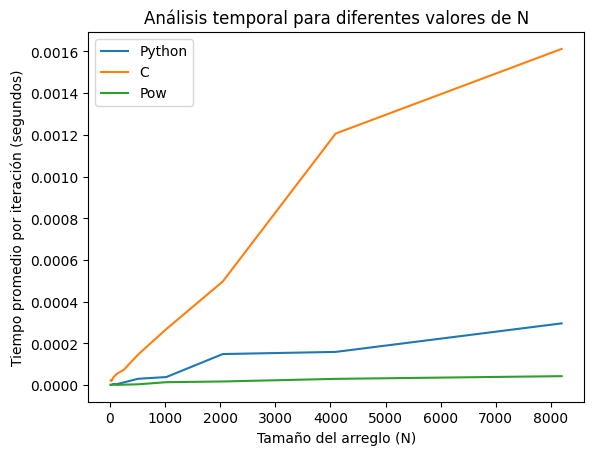

In [328]:
plt.plot(values, py_times, label='Python')
plt.plot(values, c_times, label='C')
plt.plot(values, pow_times, label='Pow')
plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('Tiempo promedio por iteración (segundos)')
plt.title('Análisis temporal para diferentes valores de N')
plt.legend()
plt.show()

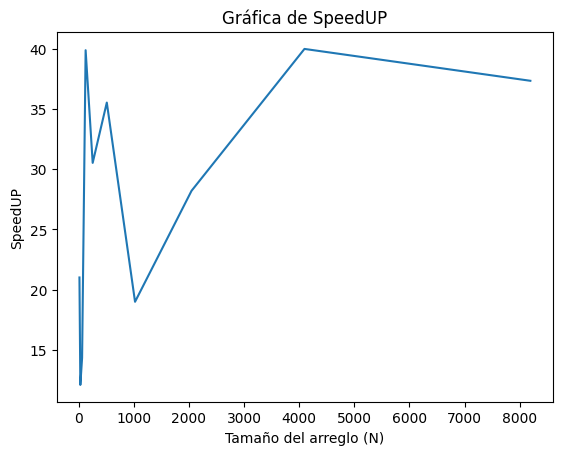

In [329]:
speedup = [c_times / pow_times for c_times, pow_times in zip(c_times, pow_times)]

plt.plot(values, speedup)
plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('SpeedUP')
plt.title('Gráfica de SpeedUP')
plt.show()